<a href="https://colab.research.google.com/github/imdhanush13/Dementia-prediction/blob/main/Dementia_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

# **CONVERTING DATASET INTO DATAFRAME**

In [2]:
data_set= pd.read_csv("/content/oasis_longitudial.csv")
data_set.replace('Converted','Demented',inplace=True)
data_set['M/F'].replace(['F','M'],[0,1],inplace=True)
data_set['Group'].replace(['Nondemented','Demented'],[0,1],inplace=True)
data_set

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2,842,1,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,1,3,2297,1,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,0,1,0,0,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,0,2,763,0,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [3]:
data_set['Group'].unique()

array([0, 1])

# **FINDING WHICH COLUMNS HAS NULL VALUES**

In [4]:
data_set.isnull().any()

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Hand          False
Age           False
EDUC          False
SES            True
MMSE           True
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

In [5]:
data_set.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

#**Droping the  rows and columns which has missing values**

In [6]:
# Dropped the  rows and columns which has missing values
ds=data_set.drop(['SES'],axis=1)
ds=ds.dropna(how='any',axis=0)
ds.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [7]:
ds['Group'].nunique()

2

# **Spliting input_features and output_feature**

In [8]:
ds.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [9]:
x = ds.drop(['Subject ID', 'MRI ID','Hand','Group'],axis=1)
y = ds['Group']
print(ds.shape,x.shape,y.shape,sep='\n')

(371, 14)
(371, 10)
(371,)


# **Spliting Dataset in ratio 80:20**

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train , Y_test= train_test_split(x, y, test_size=0.20)
print(x.shape,y.shape)
sp=[X_train,X_test,Y_train , Y_test]
for h in sp:
  print(h.shape)

(371, 10) (371,)
(296, 10)
(75, 10)
(296,)
(75,)


#**Importing,Training and validating Classification Algorithms**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC # "Support vector classifier"
svm_classifier = SVC(kernel='linear', random_state=0)
l1=['KNeighborsClassifier','DecisionTreeClassifier','GaussianNB','RandomForestClassifier','XGBClassifier','SVM_classifier']
kn , dt , nb , rf , boost =  KNeighborsClassifier() , DecisionTreeClassifier() , GaussianNB() , RandomForestClassifier() , XGBClassifier()
algo_list=[ kn , dt , nb , rf , boost ,svm_classifier]
for i in algo_list:
  i.fit(X_train,Y_train)
predicted1=[j.predict(X_test) for j in algo_list]

In [12]:
from sklearn.metrics import classification_report
for h in range(len(predicted1)):

  print('\t\t{}.{}\n\n{}'.format(h+1,l1[h],classification_report(Y_test,predicted1[h])))


		1.KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.49      0.54      0.51        39
           1       0.44      0.39      0.41        36

    accuracy                           0.47        75
   macro avg       0.46      0.46      0.46        75
weighted avg       0.46      0.47      0.46        75

		2.DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        39
           1       0.85      0.97      0.91        36

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75

		3.GaussianNB

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.95      0.97      0.96        36

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weig

	
KNeighborsClassifier=0.4666666666666667



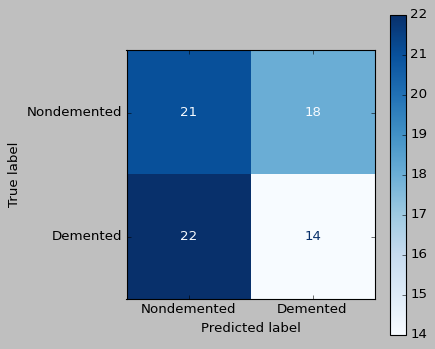

	
DecisionTreeClassifier=0.9066666666666666



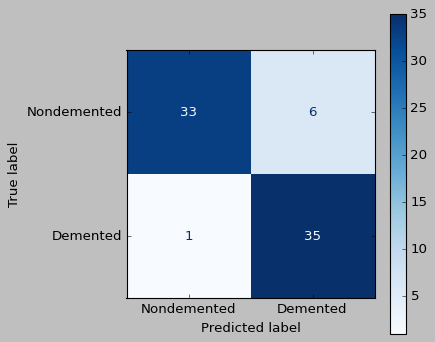

	
GaussianNB=0.96



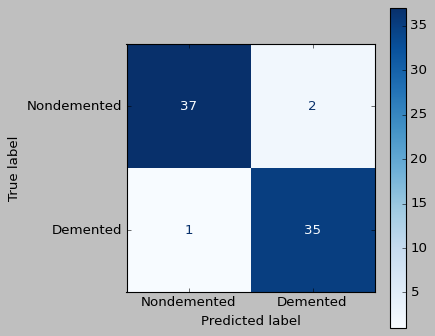

	
RandomForestClassifier=0.9733333333333334



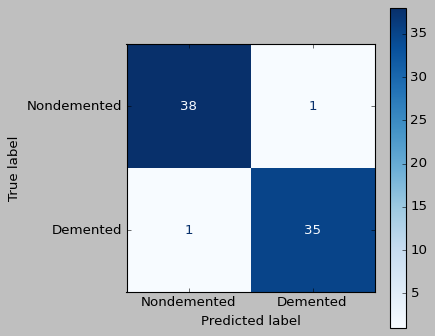

	
XGBClassifier=0.96



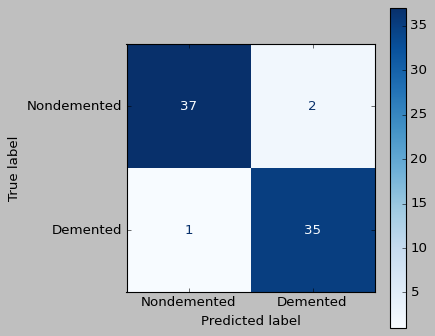

	
SVM_classifier=0.9733333333333334



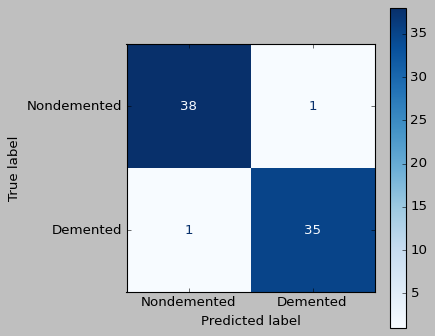

In [13]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
p_m=[confusion_matrix(Y_test,i) for i in predicted1]
cm_display = [ConfusionMatrixDisplay(confusion_matrix = j , display_labels = ['Nondemented', 'Demented']*1)  for j in p_m]
for i in range(len(cm_display)):
  print('\t\n{}={}\n'.format(l1[i],accuracy_score(Y_test,predicted1[i])))
  cm_display[i].plot(cmap=plt.cm.Blues)
  plt.gcf().set_size_inches(5, 5)
  plt.style.use('classic')
  plt.show()

#**Feature_importance**

In [14]:
feature_importance=pd.DataFrame(rf.feature_importances_,index=x.columns,
columns=['importance']).sort_values('importance')
feature_importance.head(20)

,importance
Visit,0.013549
M/F,0.020501
MR Delay,0.030361
EDUC,0.033852
Age,0.041769
eTIV,0.053030
ASF,0.059757
nWBV,0.071742
MMSE,0.145186
CDR,0.530253


In [15]:
xf=x.drop(['Visit'],axis=1)
yf=y
x_train,x_test,y_train,y_test=train_test_split(xf,yf,test_size=0.3)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC # "Support vector classifier"
svm_classifier = SVC(kernel='linear', random_state=0)
l1=['KNeighborsClassifier','DecisionTreeClassifier','GaussianNB','RandomForestClassifier','XGBClassifier','SVM_Classifier']
kn , dt , nb , rf , boost =  KNeighborsClassifier() , DecisionTreeClassifier() , GaussianNB() , RandomForestClassifier() , XGBClassifier()
algo_list=[ kn , dt , nb , rf , boost,svm_classifier]
for i in algo_list:
  i.fit(x_train,y_train)
predicted=[j.predict(x_test) for j in algo_list]

In [17]:
from sklearn.metrics import classification_report
for h in range(len(predicted)):

  print('\t\t{}.{}\n\n{}'.format(h+1,l1[h],classification_report(y_test,predicted[h])))

		1.KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.55      0.65      0.60        55
           1       0.60      0.49      0.54        57

    accuracy                           0.57       112
   macro avg       0.57      0.57      0.57       112
weighted avg       0.58      0.57      0.57       112

		2.DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        55
           1       0.93      0.98      0.96        57

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.96       112
weighted avg       0.96      0.96      0.96       112

		3.GaussianNB

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.98      0.98      0.98        57

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weig

	
KNeighborsClassifier=0.5714285714285714



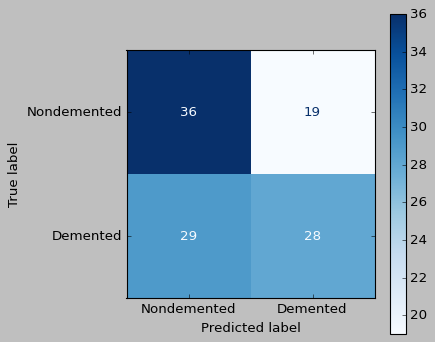

	
DecisionTreeClassifier=0.9553571428571429



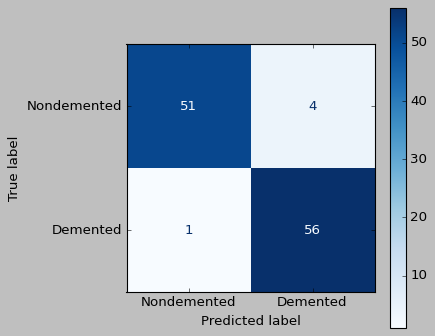

	
GaussianNB=0.9821428571428571



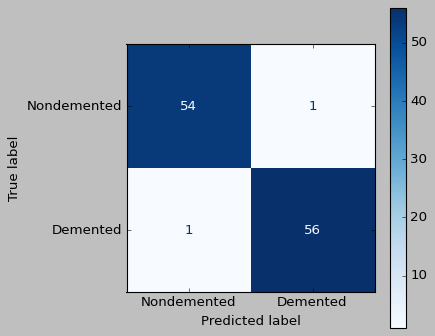

	
RandomForestClassifier=0.9821428571428571



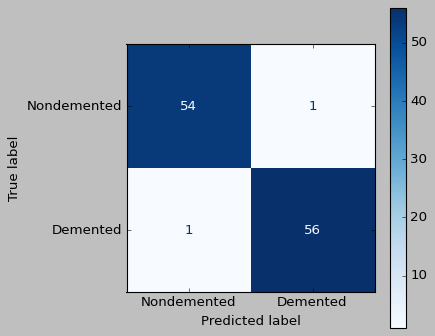

	
XGBClassifier=0.9642857142857143



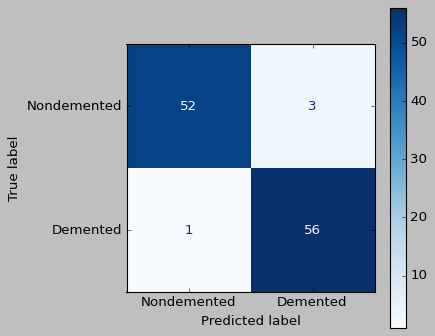

	
SVM_Classifier=0.9732142857142857



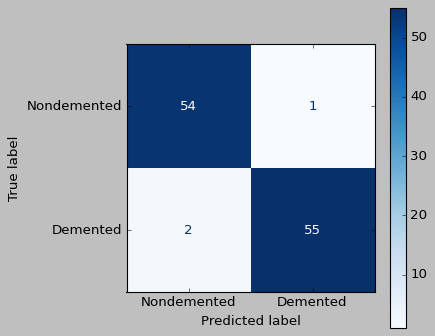

In [18]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
p_m=[confusion_matrix(y_test,i) for i in predicted]
cm_display = [ConfusionMatrixDisplay(confusion_matrix = j , display_labels = ['Nondemented', 'Demented']*1)  for j in p_m]
for i in range(len(cm_display)):
  print('\t\n{}={}\n'.format(l1[i],accuracy_score(y_test,predicted[i])))
  cm_display[i].plot(cmap=plt.cm.Blues)
  plt.gcf().set_size_inches(5, 5)
  plt.style.use('classic')
  plt.show()


#**COMPARISION OF ALGORITHMS**

In [19]:
from sklearn.metrics import accuracy_score
j1=[accuracy_score(Y_test,i) for i in predicted1]
j2=[accuracy_score(y_test,i) for i in predicted]
group=[[j1[i],j2[i]] for i in range(len(j1))]
list_of_algo=l1

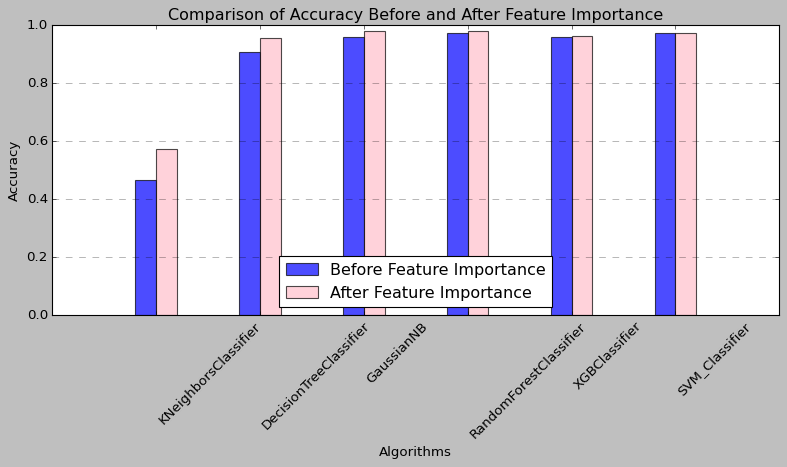

In [20]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(len(list_of_algo))
width_before = 0.2
width_after = 0.2

plt.figure(figsize=(10, 6))


plt.bar(x - width_before/2, j1, width_before, color='blue', alpha=0.7, label='Before Feature Importance')


plt.bar(x + width_after/2, j2, width_after, color='pink', alpha=0.7, label='After Feature Importance')

plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy Before and After Feature Importance")
plt.xticks(x, list_of_algo, rotation=45, ha='left')
plt.legend(loc='lower center')

plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()


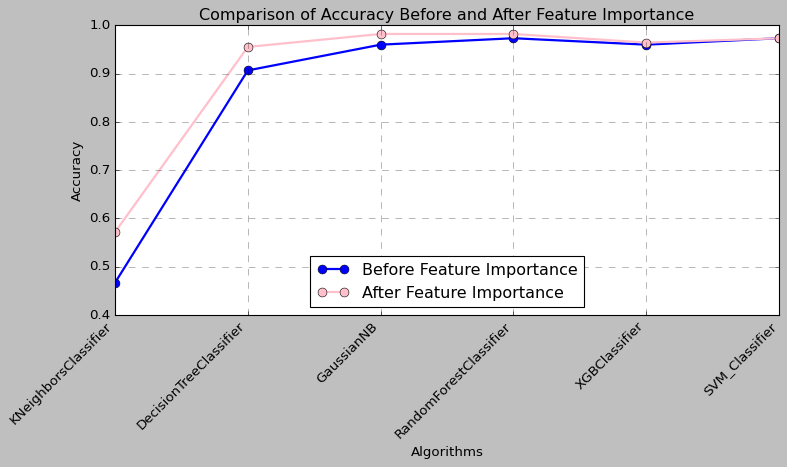

In [21]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))

plt.plot(list_of_algo, j1, color='b', marker='o', label='Before Feature Importance', linewidth=2, markersize=8)


plt.plot(list_of_algo, j2, color='pink', marker='o', label='After Feature Importance', linewidth=2, markersize=8)


plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy Before and After Feature Importance")
plt.xticks(rotation=45, ha='right')


plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(loc='lower center')

plt.tight_layout()
plt.show()
